### Load Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from collections import Counter
from imblearn.datasets import make_imbalance

In [2]:
#load the data
df = pd.read_csv('Train.csv')
# to visualize all the columns at once.
pd.set_option('display.max_columns', None)

In [3]:
#fetch first five rows
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,891,A,Ship,3,4,266,2,high,F,33,3798,1
1,892,B,Ship,3,4,255,4,low,F,12,2266,1
2,893,C,Ship,4,1,166,3,high,F,3,1453,1
3,894,F,Ship,3,2,232,2,low,F,39,2139,1
4,895,D,Ship,3,5,198,2,medium,F,62,3015,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10109 non-null  int64 
 1   Warehouse_block      10109 non-null  object
 2   Mode_of_Shipment     10109 non-null  object
 3   Customer_care_calls  10109 non-null  int64 
 4   Customer_rating      10109 non-null  int64 
 5   Cost_of_the_Product  10109 non-null  int64 
 6   Prior_purchases      10109 non-null  int64 
 7   Product_importance   10109 non-null  object
 8   Gender               10109 non-null  object
 9   Discount_offered     10109 non-null  int64 
 10  Weight_in_gms        10109 non-null  int64 
 11  Reached.on.Time_Y.N  10109 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 947.8+ KB


In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10109.00000,10109.000000,10109.000000,10109.000000,10109.000000,10109.000000,10109.000000,10109.000000
mean,5945.00000,4.091008,2.989316,211.794342,3.602236,11.671778,3747.578099,0.561183
std,2918.36127,1.143981,1.415152,47.967415,1.541395,14.791831,1632.358252,0.496267
min,891.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3418.00000,3.000000,2.000000,171.000000,3.000000,4.000000,1879.000000,0.000000
50%,5945.00000,4.000000,3.000000,217.000000,3.000000,7.000000,4295.000000,1.000000
75%,8472.00000,5.000000,4.000000,252.000000,4.000000,10.000000,5130.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,6000.000000,1.000000


In [6]:
# correlation matrix
corr = df.corr()
corr['Reached.on.Time_Y.N'].sort_values(ascending=True)

ID                    -0.347104
Weight_in_gms         -0.228124
Cost_of_the_Product   -0.049856
Customer_care_calls   -0.043790
Prior_purchases       -0.039121
Customer_rating        0.013327
Discount_offered       0.366228
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

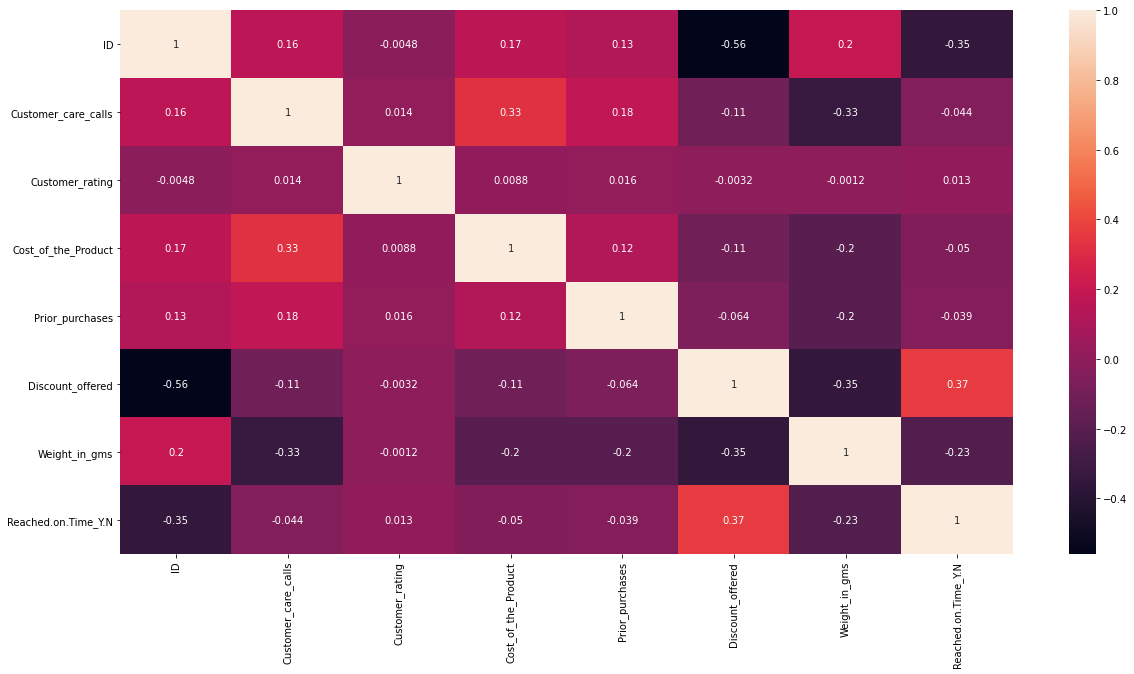

In [7]:
# plotting heatmap for obeserving correlation
sns.heatmap(data = corr, annot = True)
plt.gcf().set_size_inches(20,10)

### Summary of Dataset features
- Total Data instances - 10109
- Total column - 12

### Data Pre-Processing

In [8]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Summary of Pre-Processing
- Surprisingly this is a clean data and consequently left with no null values

### Univariate analysis for target feature

In [10]:
df['Reached.on.Time_Y.N'].value_counts()

1    5673
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [11]:
class_0, class_1 = df['Reached.on.Time_Y.N'].value_counts(normalize = True)
print(f'Class 0 before imbalance:', round(class_0 *100,1) ,'%')
print(f'Class 1 before imbalance:', round(class_1 *100,1) ,'%')

Class 0 before imbalance: 56.1 %
Class 1 before imbalance: 43.9 %


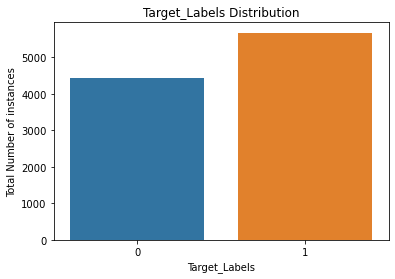

In [12]:
sns.countplot(x = 'Reached.on.Time_Y.N', data = df)
plt.title('Target_Labels Distribution')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Target_Labels Distributions.jpg')

### Imbalancing the target feature
- As mentioned in the project small imbalances of one class is fine, I'll proceed ahead with the further step 'making the target feature imbalance'

In [13]:
X = df.loc[:, df.columns != 'Reached.on.Time_Y.N']
y = df.loc[:,'Reached.on.Time_Y.N'].copy() # lets work with the copy without disturbing the original target feature

In [14]:
X.shape, y.shape

((10109, 11), (10109,))

In [15]:
# 65% imbalance
X_65, y_65 = make_imbalance(X, y, sampling_strategy={0:443 , 1: 2380}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_65)}')

Distribution after imbalancing: Counter({0: 4436, 1: 2380})


In [16]:
class0 , class1 = y_65.value_counts(normalize = True)
print(f'Class 0 after imbalance:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance:', round(class1 *100,1) ,'%')

Class 0 after imbalance: 65.1 %
Class 1 after imbalance: 34.9 %


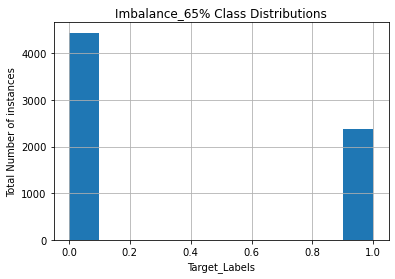

In [17]:
# 65% imbalance target feature
y_65.hist() 
plt.title('Imbalance_65% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_65% Class Distributions.jpg')

In [18]:
# 75% imbalance
X_75, y_75 = make_imbalance(X, y, sampling_strategy={0:4436 , 1: 1475}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_75)}')

Distribution after imbalancing: Counter({0: 4436, 1: 1475})


In [19]:
class0 , class1 = y_75.value_counts(normalize = True)
print(f'Class 0 after imbalance_75%:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance_75%:', round(class1 *100,1) ,'%')

Class 0 after imbalance_75%: 75.0 %
Class 1 after imbalance_75%: 25.0 %


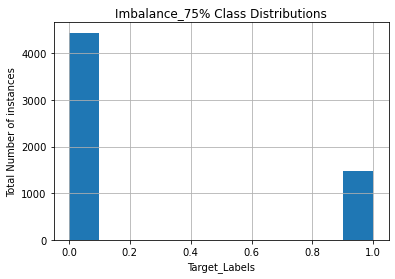

In [20]:
# 75% imbalance target feature
y_75.hist() 
plt.title('Imbalance_75% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_75% Class Distributions.jpg')

In [21]:
# 90% imbalance
X_90, y_90 = make_imbalance(X, y, sampling_strategy={0:4436 , 1: 495}, random_state=48)
print(f'Distribution after imbalancing: {Counter(y_90)}')

Distribution after imbalancing: Counter({0: 4436, 1: 495})


In [22]:
class0 , class1 = y_90.value_counts(normalize = True)
print(f'Class 0 after imbalance_90%:', round(class0 *100,1) ,'%')
print(f'Class 1 after imbalance_90%:', round(class1 *100,1) ,'%')

Class 0 after imbalance_90%: 90.0 %
Class 1 after imbalance_90%: 10.0 %


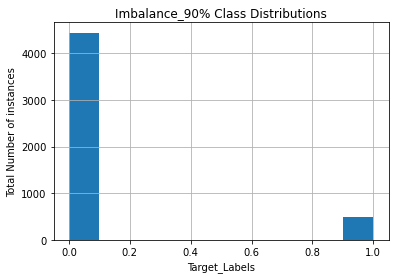

In [24]:
# 90% imbalance target feature plot
y_90.hist() 
plt.title('Imbalance_90% Class Distributions')
plt.xlabel('Target_Labels')
plt.ylabel('Total Number of instances')
plt.savefig('Imbalance_90% Class Distributions.jpg')